# Ridge regression vs. Lasso regression

Cheryl KOUADIO  
2024-09-25

# Activity 1 : Variants of OLS

## 1. Ridge regression

The ridge regression is a variant of the linear regression that is used
to prevent multicolinearity coming from the covariables in the dataset
and thus prevent overfitting. In fact, when the features are correlated,
the matrix $X^TX$ is not invertible and the least square solution is not
unique. Hence, the ridge regression is used to stabilize the solution by
adding a L2 penalty term to the loss function. It’s the reason wwhy the
ridge regression is also called a L2 regularization.

$$
\theta ^* = argmin_{\theta} \left\{ || Y - X \theta||_2 + \lambda ||\theta||_2^2 \right\}
$$

The penalty term is controlled by a hyperparameter $\lambda$. It has to
be choosed wisely (using a cross-validation method) because it balances
the trade-off between the bias and the variance of the model. We are
going to see in this activity how the bias and the variance of the ridge
regression is affected by the hyperparameter $\lambda$.

The bias of an estimator is defined as the difference between the
expected value of the estimator and the true value of the parameter
being estimated. In the ridge regression, the bias of the ridge
estimator is given by the formula:

$$\mathcal{B}(\theta ^*) = \lambda (X^{T}X+ \lambda I_d)^{-1} \theta^*$$

For the variance, it is given by:

$$\mathcal{V}(\theta ^*) = \sigma^2 (X^{T}X+ \lambda I_d)^{-2} X^{T}X $$

where $\sigma^2$ is the variance of the noise in the data.

<u>Hint to prove the bias formula</u> : factorize by
$\lambda ( X^TX + \lambda I_d)^{-1}$

In this activity, we will numerically check the formula for the bias and
the variance by generating random data and calculating the squared bias
of the sample mean. Let’s start by create a function to generate the
data with a noise $\varepsilon \sim \mathcal{N}(0,\sigma^2)$.

In [1]:
#Q1 : Function that generates data from a linear model
import numpy as np

def generate_data(X, theta, sigma_squared) :
    n = X.shape[0] # Extract the length of data sample
    noise = np.random.normal(loc=0,scale=np.sqrt(sigma_squared),size=n) # generate the error term /!\ scale = sd
    y = X.dot(theta) + noise # Y = X+theta + noise
    return y

Our goal is now to illustrate the squared bias of each coefficient as a
function of $\lambda$ when it varies between 10² and 10⁴ (in the
log-domain). We will then generate a dataset with 100 samples and 10
features and calculate the squared bias of the coefficients and the
variance for each value of $\lambda$. The features will be generated
from a normal distribution (not mandatory) and the true coefficients are
fixed. We voluntarily put to 0 some coefficients to see the effect of
the regularization.

In [2]:
from sklearn.linear_model import Ridge
import matplotlib.pyplot as plt


theta = [10,1,5,2,8,0,0,0,0,0] # Define the true theta
lambda_grid = np.logspace(-2, 4, 50) # Define the grid of lambda values
n, d = 100, 10 # Dimension of dataset
X = np.random.normal(loc=0, scale=1, size=(n, d)) #features

To compute numerically the bias and the variance of the ridge
regression, we will generation 200 datasets. We will then, for each
$\lambda$, store the mean of each coefficients (in order to compute the
numerical bias) and the standard deviation (to compute the numerical
variance).

In [3]:
n_sim=1000
estimated_theta = np.zeros((n_sim,d)) #store the estimated theta for each simulation
bias_squared = np.zeros((len(lambda_grid),d)) #store the squared bias for each lambda
variance = np.zeros((len(lambda_grid),d)) #store the variance for each lambda

# Iterate over lambda values
for idx,alpha in enumerate(lambda_grid):
    for i in range(n_sim): #start simulation
        y = generate_data(X, theta, 1)
        fit = Ridge(alpha=alpha,fit_intercept=False).fit(X,y) #we do not want the model to fit an intercept
        estimated_theta[i,:]= fit.coef_
    bias_squared[idx,:]=(np.mean(estimated_theta,axis=0)-theta)**2
    variance[idx,:] = np.std(estimated_theta,axis=0)**2

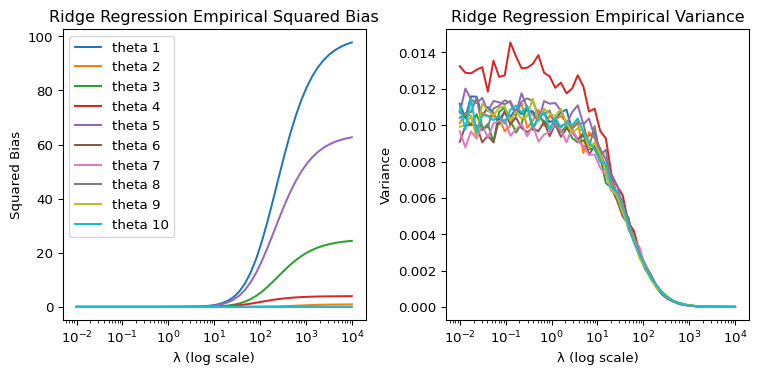

In [4]:
fig, axes = plt.subplots(1, 2, figsize=(8, 4))

for i in range(d):
    axes[0].plot(lambda_grid, bias_squared[:, i], label=f'theta {i+1}')
axes[0].set_xscale('log')
axes[0].set_xlabel('λ (log scale)')
axes[0].set_ylabel('Squared Bias')
axes[0].set_title('Ridge Regression Empirical Squared Bias')
axes[0].legend(loc='best')

# Plot variance on the second subplot
for i in range(d):
    axes[1].plot(lambda_grid, variance[:, i], label=f'theta {i+1}')
axes[1].set_xscale('log')
axes[1].set_xlabel('λ (log scale)')
axes[1].set_ylabel('Variance')
axes[1].set_title('Ridge Regression Empirical Variance')

# Show the plots
plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'Ridge Regression Empirical Variance')

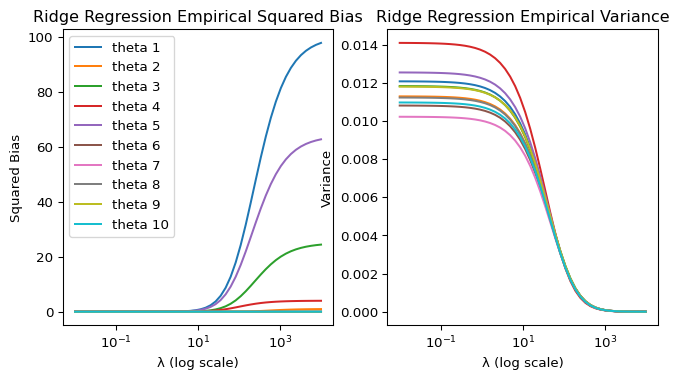

In [5]:
#Plot squared theorical bias : −λ(X^T X + λId) (−1) θ
bias_theoretical = np.zeros((len(lambda_grid), d))
variance_theorical = np.zeros((len(lambda_grid), d))

for idx, alpha in enumerate(lambda_grid):
    bias_theoretical[idx, :] = (-alpha * np.linalg.inv(X.T @ X + alpha * np.eye(d)) @ theta)**2
    variance_theorical[idx,:] = np.diag((1 * np.linalg.inv(alpha * np.eye(d) + X.T @ X)**2 @ (X.T @ X)))
    
fig,axes = plt.subplots(1,2,figsize=(8,4))

for i in range(d):
    axes[0].plot(lambda_grid, bias_theoretical[:, i], label=f'theta {i+1}')
axes[0].set_xscale('log')
axes[0].set_xlabel('λ (log scale)')
axes[0].set_ylabel('Squared Bias')
axes[0].set_title('Ridge Regression Empirical Squared Bias')
axes[0].legend(loc='best')

# Plot variance on the second subplot
for i in range(d):
    axes[1].plot(lambda_grid, variance_theorical[:, i], label=f'theta {i+1}')
axes[1].set_xscale('log')
axes[1].set_xlabel('λ (log scale)')
axes[1].set_ylabel('Variance')
axes[1].set_title('Ridge Regression Empirical Variance')

As we can see, both in the numerical and theoretical bias, the bias of
the coefficients is increasing with the increase of $\lambda$. This is
due to the fact that the regularization term is increasing and the
coefficients are getting closer to 0. The variance is also decreasing
with the increase of $\lambda$ but it is not as significant as the bias.
This is due to the fact that the variance is not directly affected by
the regularization term.

One can have an idea of this behaviour by looking at the formula of the
bias and the variance of the ridge regression, using the gram matrix
$\frac{X^TX}{n}$. In face, using the large law of numbers, we can see
that the bias is proportional to $\lambda$ and the variance is inversely
proportional to $\lambda$.

<u><b>Proof</b></u> :

$\frac{X^TX}{n} \rightarrow E(X^TX) = V(X)$, when
$n \rightarrow \infty$, and $V(X)$ is the covariance matrix of the
features. When X is centered and normalized, $V(X) = I_d$. Using this in
the formula of the bias and the variance, we get:

$$\mathcal{B}(\theta ^*) = \frac{-\lambda}{n+\lambda} \theta^*$$

$$\mathcal{V}(\theta ^*) = \frac{\sigma^2}{(n+\lambda)^2} I_d$$

## 2. Lasso regression

If we are interessed in the variaton of the bias and the variance of the
lasso regression which is another variants of the linear regression that
is mainly used to perform feature selection, we don’t have a specific
formula defined. However, we can numerically check the bias of the lasso
regression by generating random data and calculating the squared bias of
the sample mean, as we did for the ridge regression. The lasso
regression is a L1 regularization and the loss function is defined as:

$$
\theta ^* = argmin_{\theta} \left\{ || Y - X \theta||_2 + \lambda ||\theta||_1 \right\}
$$

In [6]:
from sklearn.linear_model import Lasso

lasso_bias_squared = np.zeros((len(lambda_grid), d))
variance_lasso = np.zeros((len(lambda_grid), d))
estimated_theta_lasso = np.zeros((n_sim, d))

# Iterate over lambda values
for idx, alpha in enumerate(lambda_grid):
        for i in range(n_sim) :
            y = generate_data(X, theta, 1)
            fit = Lasso(alpha=alpha,fit_intercept=False).fit(X,y)
            estimated_theta_lasso[i,:]= fit.coef_
        lasso_bias_squared[idx, :] = (np.mean(estimated_theta_lasso,axis=0)- theta) ** 2
        variance_lasso[idx, :] = np.std(estimated_theta_lasso, axis=0) ** 2

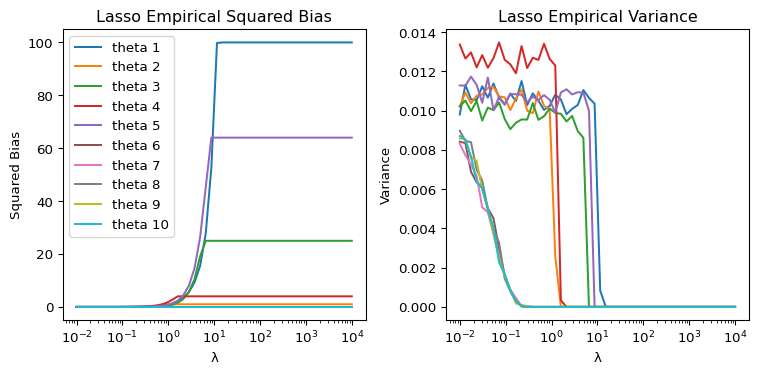

In [7]:
fig, axes = plt.subplots(1, 2, figsize=(8, 4))

for i in range(d):
    axes[0].plot(lambda_grid, lasso_bias_squared[:, i],label=f'theta {i+1}')

axes[0].set_xscale('log')
axes[0].set_xlabel('λ')
axes[0].set_ylabel('Squared Bias')
axes[0].set_title('Lasso Empirical Squared Bias')
axes[0].legend(loc='best')

for i in range(d):
    axes[1].plot(lambda_grid, variance_lasso[:, i],label=f'theta {i+1}')

axes[1].set_xscale('log')
axes[1].set_xlabel('λ')
axes[1].set_ylabel('Variance')
axes[1].set_title('Lasso Empirical Variance')
plt.tight_layout()
plt.show()

# Activity 2 : Contamination dataset

We now work with a dataset related to diabetes. The initial data
consists of $n$ = 442 patients and $d$ = 10 covariates and the output
variable $Y$ is a score reflecting the disease progressing. During a
cyberattack of the hospital housing the data, a bad robot has
contaminated the dataset by adding 200 inappropriate exploratory
variables. Since simply noising the data was not sufficient for the
robot, he also arbitrarily permuted the variables. To complete the
picture, the robot has erased any trace of his villainous act and thus
we do not know which variables are relevant. The new data set contains
$n$ = 442 patients and $d$ = 210 covariates.

We are trying to resolve the enigma created by the playful machine and
retrieve the relevant variables. We will hence use a regularized
regression model to select the relevant variables.

In [8]:
import warnings 
warnings.filterwarnings('ignore')

In [9]:
#read data from csv file
import pandas as pd
data = pd.read_csv("data_dm3.csv", sep=",", header=None)

# renommer les 210 premiers colonnes en X1, X2, ..., X210 et la dernière colonne en Y
data.columns = [f'X{i}' for i in range(1, 211)] + ['Y']
data.head()

5 rows × 211 columns

First, we will split the dataset into training and test sets. We will
use the first 80% of the dataset for training and the remaining 20% for
testing.

In [10]:
# split dataset to train and test
from sklearn.model_selection import train_test_split

X = data.drop(columns='Y')
y = data['Y']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
#test if the splitting is effective
n=X.shape[0]
print(f'Train size (proportion) : {X_train.shape[0]/n : .2f} \nTest size (proportion) : {X_test.shape[0]/n : .2f}')

Train size (proportion) :  0.80 
Test size (proportion) :  0.20

## 1. Ridge regression

On training samples, we will try to fit a linear model using Ridge
regression by choosing the regularization parameter $\lambda$ by
cross-validation. We will use the function `RidgeCV` from the `sklearn`
library to perform the cross-validation. Since we didn’t center the
covariables, we will set the parameter `fit_intercept` to `True` in
order to include an intercept in the model.

    By default, the function that performs the cross validation in ridge regression performs "leave-one-out" cross-validation. In fact, leave-one-out cross-validation is a special case of k-fold cross-validation where k is equal to the number of samples. It is computationally expensive, but it is useful for small datasets. However, in ridge regression can be useful since the formula of shermann-morrison-woodbury can be used in order to use the estimator of a single ridge regession in other to compute the estimator of the leave-one-out cross-validation.

In [11]:
from sklearn.linear_model import RidgeCV

lambda_grid = np.logspace(-2, 4, 50)
ridge_cv = RidgeCV(alphas=lambda_grid,fit_intercept=True).fit(X_train, y_train) #to perform cross validation

We might interested in visualizing the path of the coefficients as a
function of the regularization parameter λ. This is called
regularization path. We can do this by fitting the model for different
values of λ and store the coefficients.

In [12]:
# plot the coefficients as a function of lambda
coefs = []
for a in lambda_grid:
    ridge = Ridge(alpha=a, fit_intercept=True).fit(X, y)
    coefs.append(ridge.coef_)

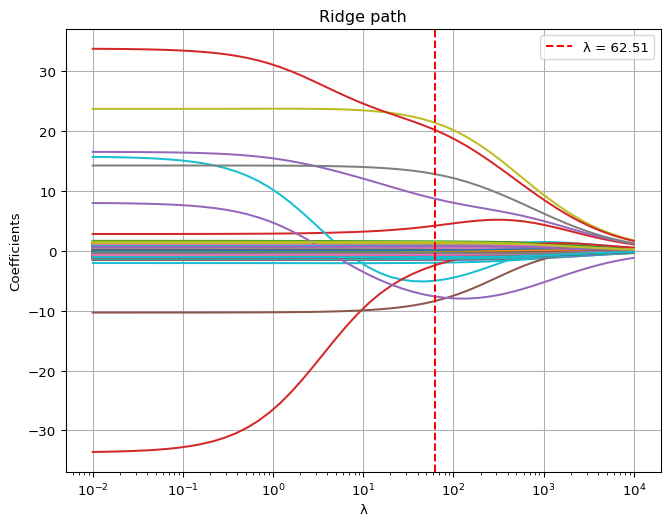

In [13]:
plt.figure(figsize=(8, 6))
plt.plot(lambda_grid, coefs)
plt.xscale('log')
plt.xlabel('λ')
plt.ylabel('Coefficients')
plt.axvline(x=ridge_cv.alpha_, color='r', linestyle='--', label=f'λ = {ridge_cv.alpha_:.2f}')
plt.title("Ridge path")
plt.legend(loc='best')
plt.grid(True)
plt.show()

We can hereby see that the ridge regression does not really help to
select the 10 relevant variables by shrinking the coefficients of the
irrelevant variables.

Ridge regression tends to favor a model with a higher number of
parameters, as it shrinks less important coefficients but keeps them in
the model. This is why it is important to choose the regularization
parameter $\lambda$ wisely. However, it includes all the variables in
the model, with reduced but non-zero coefficients.

<i> In our case, it still gives an indication on the 10 variables that
were relevant in the initial dataset before the contamination, but is
clearly not the best method to select the relevant variables. </i>

#### a. Check on the intercept value of the model using lambda found by cross validation

In [14]:
print(f'Intercept value : {ridge_cv.intercept_}')

Intercept value : 152.28937186306018

The intercept value of the model is 152.29, which means that the model
predicts a value of 152.29 for the response variables when all the
features are zero. It can be interpreted as the base value of the model.
Taking in account the context of the dataset, we can say that the
patients used in the dataset have a score of 152.29 (which might be
quite high or not - depending on the scale) of having diabetes
independently of the features.

## 2. Lasso regression

We will now use the lasso regression to check if it can help use to
select the most important variables. We will use the same lambda grid as
before and also perform a cross validation. It is important to perform a
cross-validation in order to choose the best value of the regularization
parameter $\lambda$ as we have demonstrated in the first activity. For
the lasso regression, we will use the function `LassoCV` from the
`sklearn` library. By default, the function uses the coordinate descent
algorithm to fit the model. It is a very efficient algorithm to solve
the lasso problem because of the non-smoothness of the L1 norm.

In [15]:
from sklearn.linear_model import LassoCV

lasso_cv = LassoCV(alphas=lambda_grid,fit_intercept=True).fit(X_train, y_train)

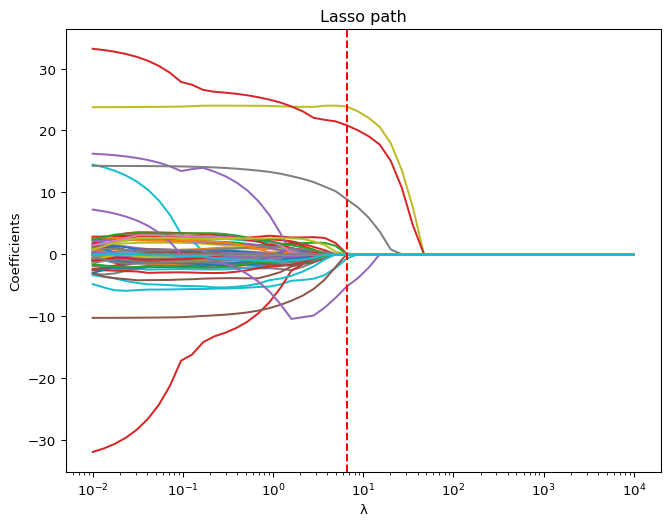

In [16]:
#LASSO PATH
coefs_lasso = []
for a in lambda_grid:
    lasso = Lasso(alpha=a, fit_intercept=True)
    lasso.fit(X, y)
    coefs_lasso.append(lasso.coef_)

plt.figure(figsize=(8, 6))
plt.plot(lambda_grid, coefs_lasso)
plt.xscale('log')
plt.xlabel('λ')
plt.ylabel('Coefficients')
plt.title("Lasso path")
plt.axvline(x=lasso_cv.alpha_, color='r', linestyle='--', label=f'λ = {lasso_cv.alpha_:.2f}')
plt.show()

Using the lasso regression, we can see that the coefficients of the
irrelevant variables are set to zero. This is why the lasso regression
is a good method to perform feature selection. Using the default value
of the regularization parameter $\lambda$ given by cross-validation, we
can see that the lasso regression is able to select the 6 relevant
variables. However, by changing the value of $\lambda$, we can select
more or less variables.

``` python
    # check number of variables selected
    np.sum(lasso_cv.coef_ != 0)
```

#### a. Check on the intercept value of the model using lambda found by cross validation

We get approximatively the same value for the intercept as the one
obtained with Ridge regression.

In [17]:
# check value of intercept
print(f'Intercept value : {lasso_cv.intercept_}')

Intercept value : 151.95282341561403

## 3. Quality of the models (ridge regression vs lasso regression)

In linear regression, we evaluate the quality of the model using the
quadratic loss function. The quadratic risk is the expected value of the
square of the difference between the true value and the predicted value.
The mean squared error is then given by the formula:

$$\mathcal{R}(\hat\theta) =  \frac{1}{n} \sum_{i=1}^{n} \left(y_i - \hat g(x_i) \right) ^2$$

where $\hat g(x)$ is the predicted value of the output variable y given
the input variable x,
$\hat g(x) =\hat  \theta_0 + \sum_{j=0}^d \hat \theta_j x_j$.

In [18]:
from sklearn.metrics import mean_squared_error

y_pred_lasso = lasso_cv.predict(X_test)
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
print(f'Mean Squared Error for Lasso: {mse_lasso:.2f}')

y_pred_ridge = ridge_cv.predict(X_test)
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
print(f'Mean Squared Error for Ridge: {mse_ridge:.2f}')

Mean Squared Error for Lasso: 2869.43
Mean Squared Error for Ridge: 2923.54

As we can see, the MSE of the lasso regression is less than the error of
the ridge regression. This is because the lasso regression is more
efficient in selecting the relevant variables. The ridge regression is
more efficient for numerical stability and for multicollinearity problem
in the dataset, but it does not perform variable selection.

Still, the MSE of both models are quite high, it might be due many facts
such as the response variable is not linearly dependent on the features
or that the features are not relevant to predict the response variable.
We did not also scale the features nor the response variable, which
might affect the performance of the model.